In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2a) First, using a sample of nearby stars (d < 100 pc) with good colors (S/N in the blue and red bands ≥5) and excellent parallaxes (S/N > 20), identify the white dwarfs on a color-magnitude diagram

In [2]:
#read in the gaia query results, sdss cross matched stars, cooling curves
gaia = pd.read_csv("white-dwarfs-hw6-result.csv", sep = ',')
sdssXgaia3_spec = pd.read_csv('xmatch_gaia3_sdss-result.csv', sep = ',')
sdssXgaia3_phot = pd.read_csv('xmatch_sdss_gaia_photometry-result.csv', sep = ',')

/var/folders/wv/y9bnhr2x4q98_z1q32p4kwtm0000gn/T/ipykernel_20175/2977507534.py:3: DtypeWarning: Columns (169) have mixed types. Specify dtype option on import or set low_memory=False.
  sdssXgaia3_spec = pd.read_csv('xmatch_gaia3_sdss-result.csv', sep = ',')


In [3]:
cooling_curves = [None]*12

for i in range(12):
    name_str = str((i+2)/10)
    cooling_curves[i] = pd.read_csv('./WD_CMD/Table_Mass_'+name_str, delim_whitespace = True, \
                                    skiprows=1, nrows=42)

In [4]:
source_ids_g = gaia['source_id']
bprp_g = gaia['bp_rp']
gmag_app_g = gaia['phot_g_mean_mag']
parallax_g = gaia['parallax']

In [5]:
#define a function to convert between apparent magnitude, absolute
#magnitude, and distance

def distanceModulus (arrow, app = None, Abs = None, d = None):
    #arrow = 'get app' converts from Abs -> app using d
    #arrow = 'get Abs' converts from app -> Abs using d
    #arrow = 'get d' calculates d using app & Abs mags
    
    #assume d is in parsec
    log = np.log10
    
    if arrow == 'get app':
        app = (5*log(d/10)) + Abs
        return app
        
    elif arrow == 'get Abs':
        Abs = app - (5*log(d/10))
        return Abs
            
    elif arrow == 'get d':
        exp = 1 + (app - Abs)/5
        d = 10**(exp)
        return d

In [6]:
d_g = 1000/parallax_g
gmag_abs_g = distanceModulus('get Abs', app = gmag_app_g, d = d_g)

In [7]:
#define a line to use as a cut-off for white dwarfs
x_thresh = np.linspace(-1,3,200)
y_thresh = x_thresh*3 + 9

In [8]:
#then select data point based on that line
num_stars = len(bprp_g)
wds_gaia = pd.DataFrame(columns=['source_id','bprp','gmag'])

for i in range(num_stars):
    if gmag_abs_g[i] > 9 + 3*bprp_g[i]:
        wds_gaia.at[i, 'source_id'] = source_ids_g[i]
        wds_gaia.at[i,'bprp'] = bprp_g[i]
        wds_gaia.at[i,'gmag'] = gmag_abs_g[i]

wds_bprp = wds_gaia['bprp']
wds_gmag = wds_gaia['gmag']

In [9]:
# CMD
plt.subplots(figsize=(8,8), dpi=200)
plt.scatter(bprp_g,gmag_abs_g, s = 0.1, alpha = 0.5, color = 'xkcd:greyish purple', label= 'Gaia Data')
plt.scatter(wds_bprp, wds_gmag, s = 0.1, alpha = 0.5, color = 'xkcd:neon blue', label = 'White Dwarfs')
plt.plot(x_thresh,y_thresh, color = 'xkcd:dull pink', label = 'WD cut-off', linestyle='--')
plt.ylabel('Absolute Magnitude in Gaia G-Band')
plt.xlabel('B-R color in Gaia bands (mag)')
plt.ylim(20,-1)

plt.legend(markerscale=5)

plt.show()

#change marker size in legend so 'gaia data is visible'

2b) Once you select the white dwarfs, use the Gaia cross-matches with SDSS to get white dwarfs with SDSS photometry. Plot color-magnitude diagrams in the Gaia bands (MG vs. BP–RP) and in the blue SDSS bands (Mu vs. u − g).

In [10]:
#this takes the cross matched stars & only picks out the white dwarfs identified ^
wds_in_sdssXgaia = pd.merge(sdssXgaia3_phot, wds_gaia, on='source_id')                       

In [11]:
umag_app_s = wds_in_sdssXgaia['petromag_u']
gmag_app_s = wds_in_sdssXgaia['petromag_g']
d_s = 1000/wds_in_sdssXgaia['parallax']

umag_abs_s = distanceModulus('get Abs', app = umag_app_s, d=d_s)
gmag_abs_s = distanceModulus('get Abs', app = gmag_app_s, d=d_s)

ug_s = umag_abs_s - gmag_abs_s

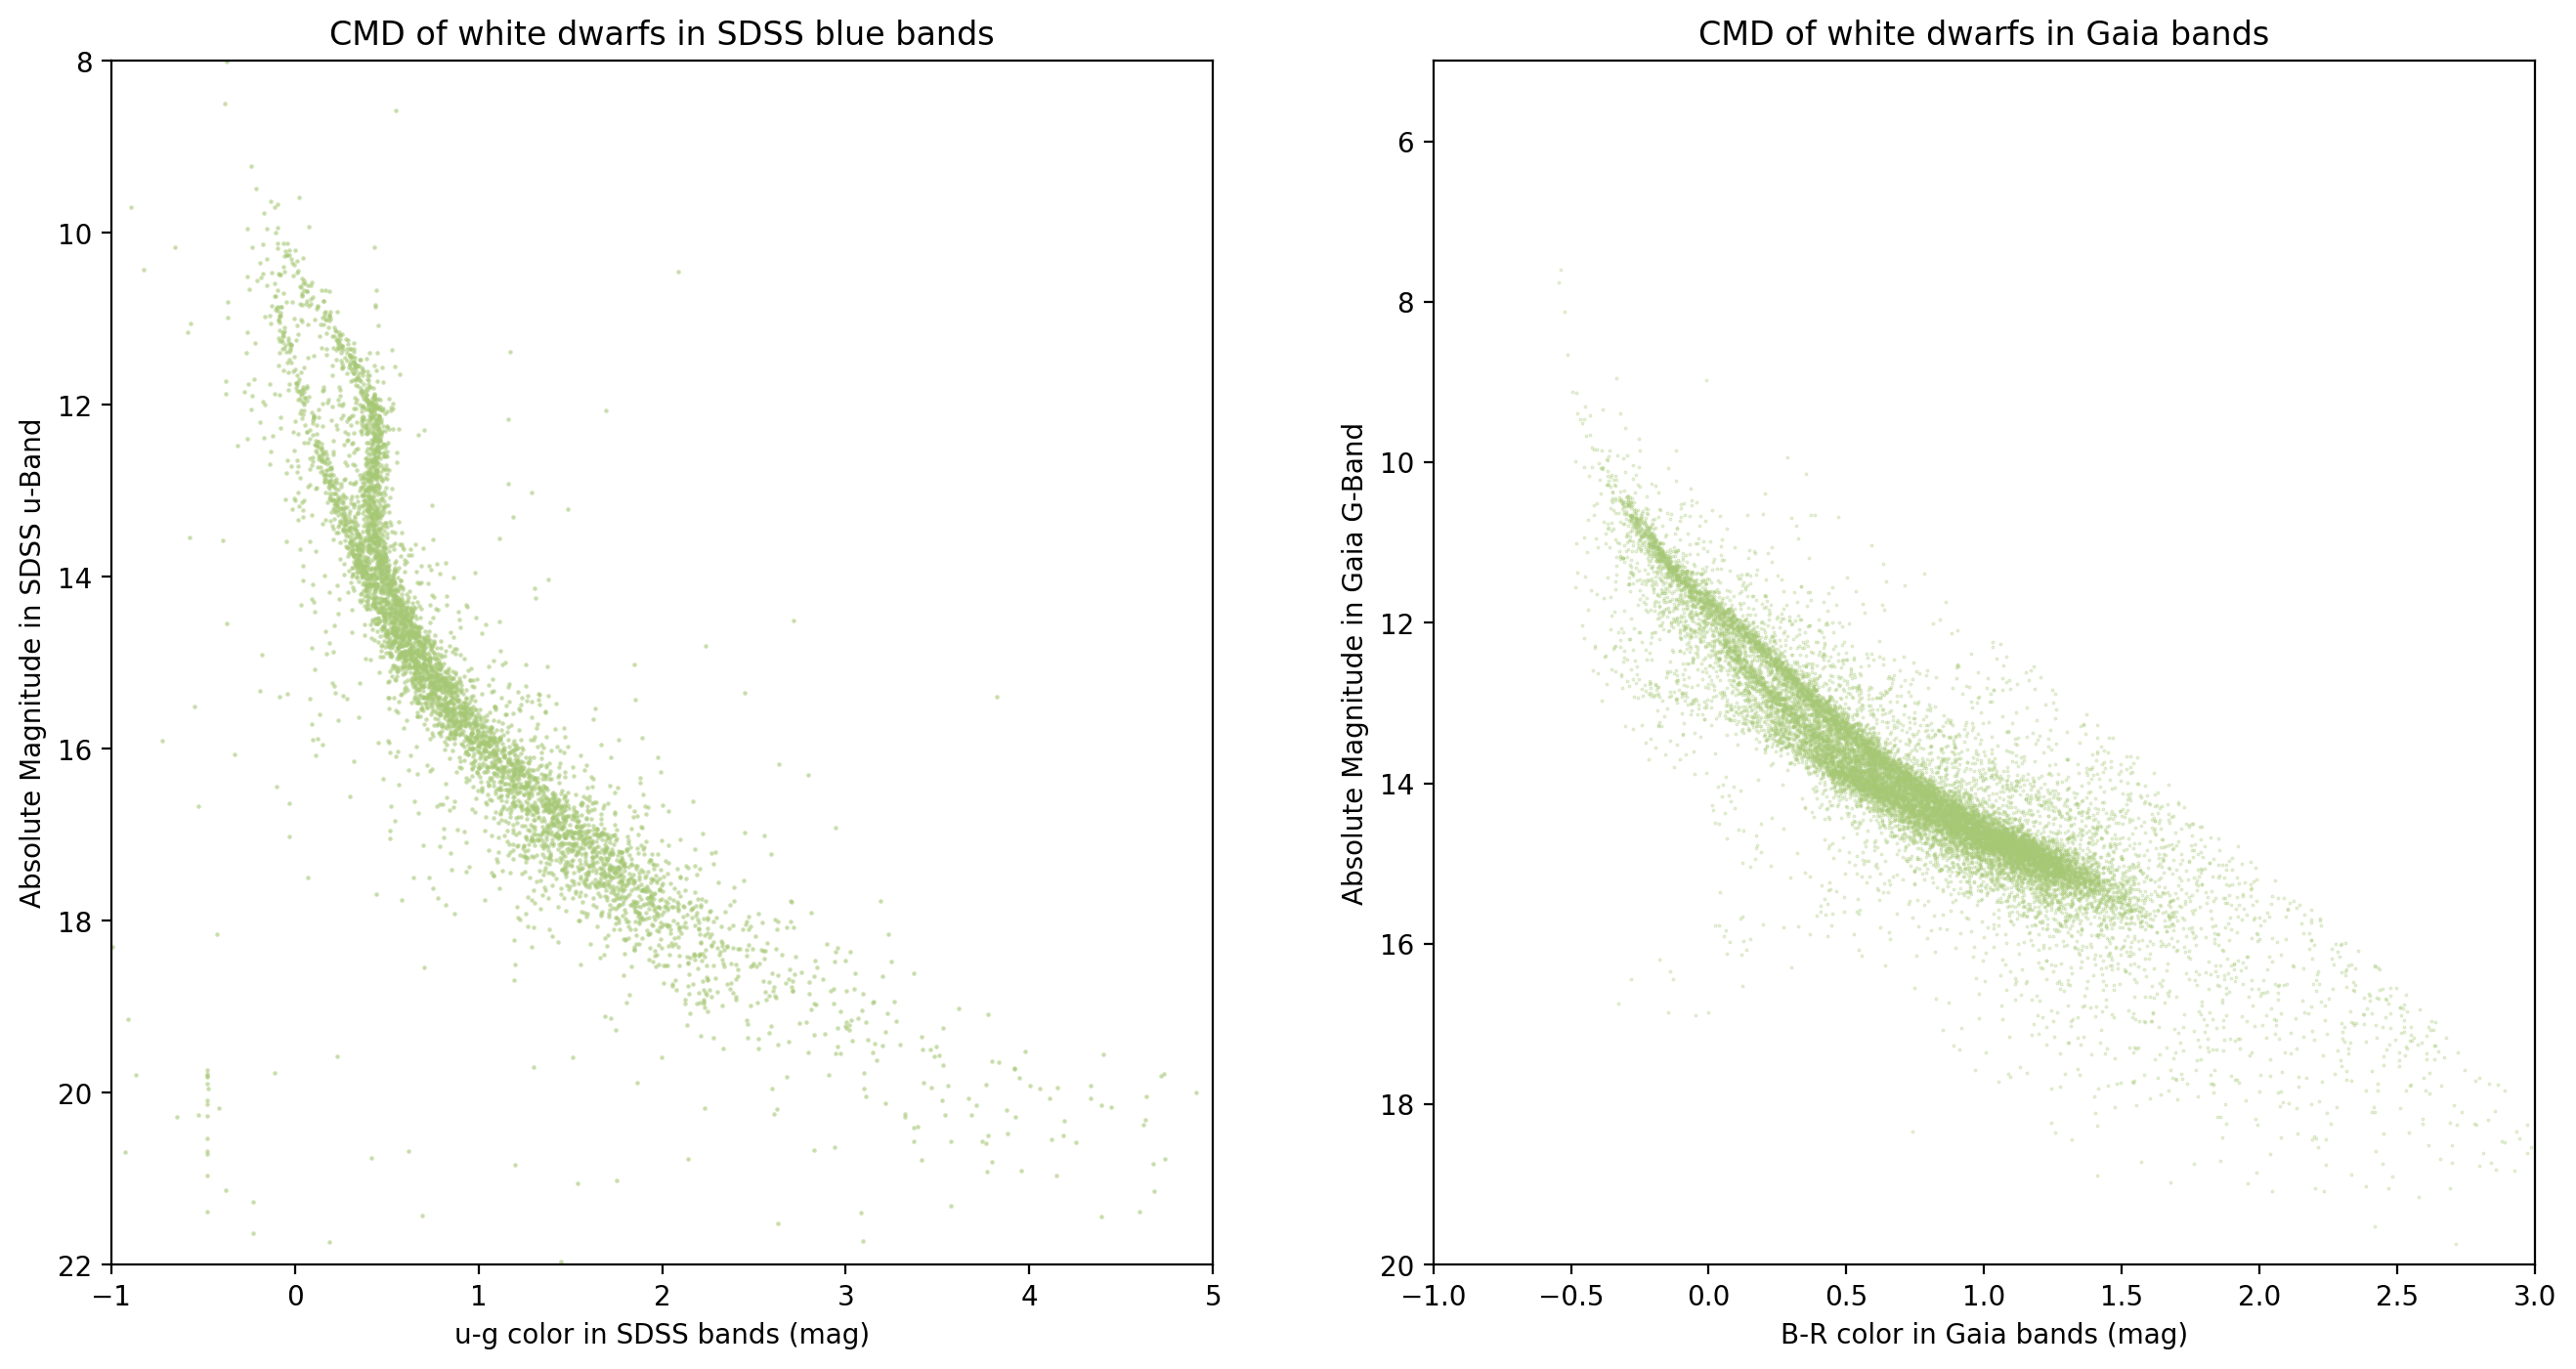

In [12]:
# CMDs cross-matching Gaia with SDSS photometry
fig, axs = plt.subplots(1,2,figsize=(16,8), dpi=200)
axs[0].scatter(ug_s,umag_abs_s, s = 0.5, alpha = 0.5, color = 'xkcd:light moss green')#, label= 'Gaia Data')
axs[0].set_ylim(22,8)
axs[0].set_xlim(-1,5)
axs[0].set_ylabel('Absolute Magnitude in SDSS u-Band')
axs[0].set_xlabel('u-g color in SDSS bands (mag)')
axs[0].set_title('CMD of white dwarfs in SDSS blue bands')

axs[1].scatter(wds_bprp,wds_gmag, s = 0.1, alpha = 0.5, color = 'xkcd:light moss green')#, label= 'Gaia Data')
axs[1].set_ylim(20,5)
axs[1].set_xlim(-1,3)
axs[1].set_ylabel('Absolute Magnitude in Gaia G-Band')
axs[1].set_xlabel('B-R color in Gaia bands (mag)')
axs[1].set_title('CMD of white dwarfs in Gaia bands')

plt.show()

2c) The provided CSV file (SDSS WDs.csv) has a list of SDSS white dwarfs and their associated photometry. Cross-match with Gaia to create a list of spectroscopically classified white dwarfs in Gaia. 
- On a separate plot, remake your color-magnitude diagrams for the Gaia white dwarf sample from (b), including all stars from (b). On top of that, plot the DA, DB, and DQ white dwarfs as distinct colors and label them. 
- How do the stellar classes match up with the structure seen in the CMD? Remark on differences between the Gaia and SDSS CMDs.

In [13]:
#make new dataframes based on values along spectype column
DA_wds = sdssXgaia3_spec[sdssXgaia3_spec['spectype'] == 'DA']
DB_wds = sdssXgaia3_spec[sdssXgaia3_spec['spectype'] == 'DB']
DQ_wds = sdssXgaia3_spec[sdssXgaia3_spec['spectype'] == 'DQ']

In [14]:
#define a function to pull out the u, u-g, bprp, and G band columns
def getPhot(table):
    p = table['parallax'] #mas
    d = 1000/p #pc
    
    u_s = table['mag_u']
    g_s = table['mag_g']
    bprp_g = table['bp_rp']
    g_g = table['phot_g_mean_mag']
    
    #app -> Abs mags
    u_s = distanceModulus('get Abs', app=u_s, d=d)
    g_s = distanceModulus('get Abs', app=g_s, d=d)
    g_g = distanceModulus('get Abs', app=g_g, d=d)
    
    return np.array((u_s - g_s, u_s, bprp_g, g_g))

In [15]:
DA_colors = getPhot(DA_wds)

DA_ug_s = DA_colors[0]
DA_u_s = DA_colors[1]
DA_bprp_g = DA_colors[2]
DA_g_g = DA_colors[3]

#------

DB_colors = getPhot(DB_wds)

DB_ug_s = DB_colors[0]
DB_u_s = DB_colors[1]
DB_bprp_g = DB_colors[2]
DB_g_g = DB_colors[3]

#-----

DQ_colors = getPhot(DQ_wds)

DQ_ug_s = DQ_colors[0]
DQ_u_s = DQ_colors[1]
DQ_bprp_g = DQ_colors[2]
DQ_g_g = DQ_colors[3]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


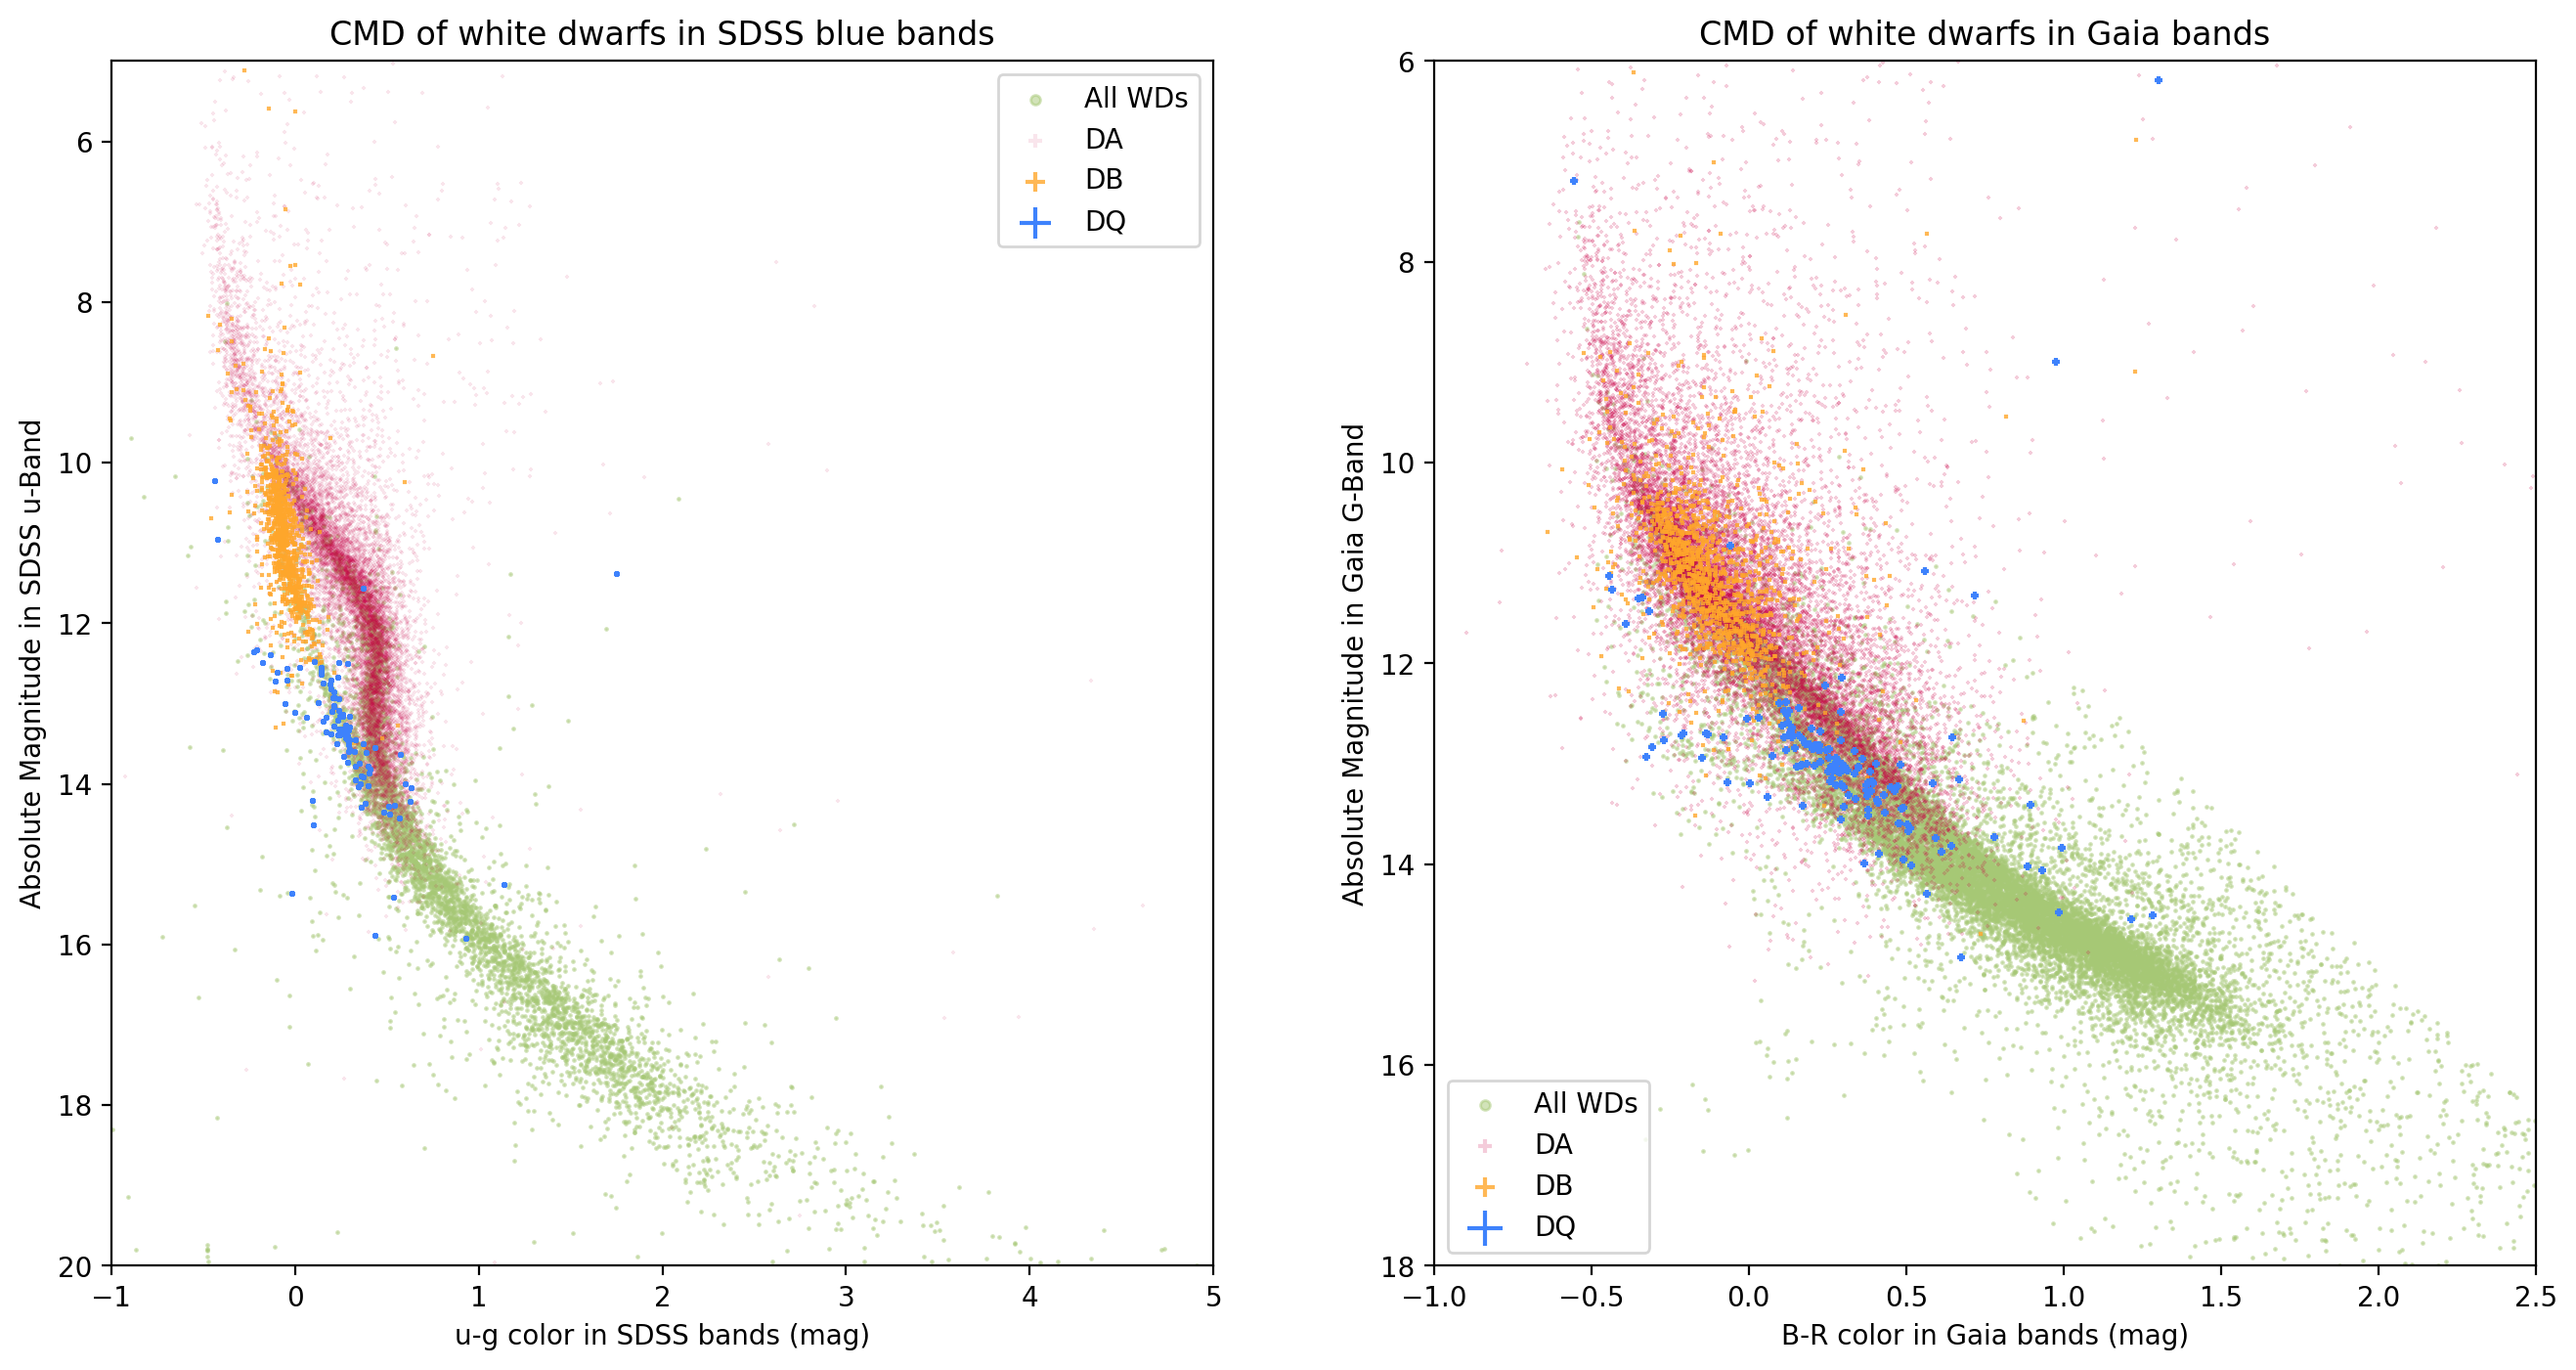

In [ ]:
# CMDs cross-matching Gaia with SDSS photometry

#--------SDSS-------
fig, axs = plt.subplots(1,2,figsize=(16,8), dpi=200)
axs[0].scatter(ug_s,umag_abs_s, s = 0.5, alpha = 0.5, color = 'xkcd:light moss green', label= 'All WDs')
axs[0].scatter(DA_ug_s, DA_u_s, s = 1, alpha = 0.1,marker='+', color='xkcd:ruby', label = 'DA')
axs[0].scatter(DB_ug_s, DB_u_s, s = 2, alpha = 0.8,marker='+', color='xkcd:mango', label = 'DB')
axs[0].scatter(DQ_ug_s, DQ_u_s, s = 5, marker='+', color='xkcd:dodger blue', label = 'DQ')
               
               
axs[0].set_ylim(20,5)
axs[0].set_xlim(-1,5)
axs[0].set_ylabel('Absolute Magnitude in SDSS u-Band')
axs[0].set_xlabel('u-g color in SDSS bands (mag)')
axs[0].set_title('CMD of white dwarfs in SDSS blue bands')
axs[0].legend(markerscale=5)

#--------GAIA-----------

axs[1].scatter(wds_bprp,wds_gmag, s = 0.5, alpha = 0.5, color = 'xkcd:light moss green', label= 'All WDs')
axs[1].scatter(DA_bprp_g, DA_g_g, s = 1, alpha = 0.2,marker='+', color='xkcd:ruby', label = 'DA')
axs[1].scatter(DB_bprp_g, DB_g_g, s = 2, alpha = 0.8,marker='+', color='xkcd:mango', label = 'DB')
axs[1].scatter(DQ_bprp_g, DQ_g_g, s = 7,marker='+', color='xkcd:dodger blue', label = 'DQ')


axs[1].set_ylim(18,6)
axs[1].set_xlim(-1,2.5)
axs[1].set_ylabel('Absolute Magnitude in Gaia G-Band')
axs[1].set_xlabel('B-R color in Gaia bands (mag)')
axs[1].set_title('CMD of white dwarfs in Gaia bands')
axs[1].legend(markerscale=5)
plt.show()

2d) The position of a white dwarf on the CMD depends on its mass and age. Reproduce the CMD from (b) and plot the 0.2, 0.6, and 1.0 M⊙ cooling curves. Connect the curves in intervals of 1 Gyr to create a grid for white dwarf cooling that depends on mass and age.

In [17]:
#define function to pull out color & age columns
def coolCurve(mass_crv):
    #all the colors are in absolute magnitudes
    u_s = mass_crv['u']
    g_s = mass_crv['g.1']
    
    bp_g = mass_crv['G3_BP']
    rp_g = mass_crv['G3_RP']
    g_g = mass_crv['G3']
    
    age = mass_crv['Age']
    
    return np.array((u_s - g_s, u_s, bp_g - rp_g, g_g, age))

In [18]:
#----- pulling out cooling curves for 0.2Msun -----

_02 = coolCurve(cooling_curves[0])
ug_ccrv_02 = _02[0]
u_ccrv_02 = _02[1]

bprp_ccrv_02 = _02[2]
g_gaia_ccrv_02 = _02[3]

age_ccrv_02 = _02[4]


#----- pulling out cooling curves for 0.6Msun -----

_06 = coolCurve(cooling_curves[4])
ug_ccrv_06 = _06[0]
u_ccrv_06 = _06[1]

bprp_ccrv_06 = _06[2]
g_gaia_ccrv_06 = _06[3]

age_ccrv_06 = _06[4]



#----- pulling out cooling curves for 1Msun -----

_1 = coolCurve(cooling_curves[8])
ug_ccrv_1 = _1[0]
u_ccrv_1 = _1[1]

bprp_ccrv_1 = _1[2]
g_gaia_ccrv_1 = _1[3]

age_ccrv_1 = _1[4]

In [19]:
#lines of constant age through the cooling curve

#then create an array of age values to draw lines through
age_pts = np.linspace(1.0e9,10.0e9,10)

age_lines_sdss = np.zeros((len(age_pts),2,3))
age_lines_gaia = np.zeros((len(age_pts),2,3))

#save the u-g values at the points where the mass-specific cooling curves are equal to each age point
for i in range(len(age_pts)):
    age = age_pts[i]
    i_02 = np.argmin(abs(age_ccrv_02-age))
    
    age_lines_sdss[i][0][0] = ug_ccrv_02[i_02]
    age_lines_sdss[i][1][0] = u_ccrv_02[i_02]

    age_lines_gaia[i][0][0] = bprp_ccrv_02[i_02]
    age_lines_gaia[i][1][0] = g_gaia_ccrv_02[i_02]
    
    
    i_06 = np.argmin(abs(age_ccrv_06-age))
    
    age_lines_sdss[i][0][1] = ug_ccrv_06[i_06]
    age_lines_sdss[i][1][1] = u_ccrv_06[i_06]

    age_lines_gaia[i][0][1] = bprp_ccrv_06[i_06]
    age_lines_gaia[i][1][1] = g_gaia_ccrv_06[i_06]
    
    i_1 = np.argmin(abs(age_ccrv_1-age))
    
    age_lines_sdss[i][0][2] = ug_ccrv_1[i_1]
    age_lines_sdss[i][1][2] = u_ccrv_1[i_1]

    age_lines_gaia[i][0][2] = bprp_ccrv_1[i_1]
    age_lines_gaia[i][1][2] = g_gaia_ccrv_1[i_1]
    
    

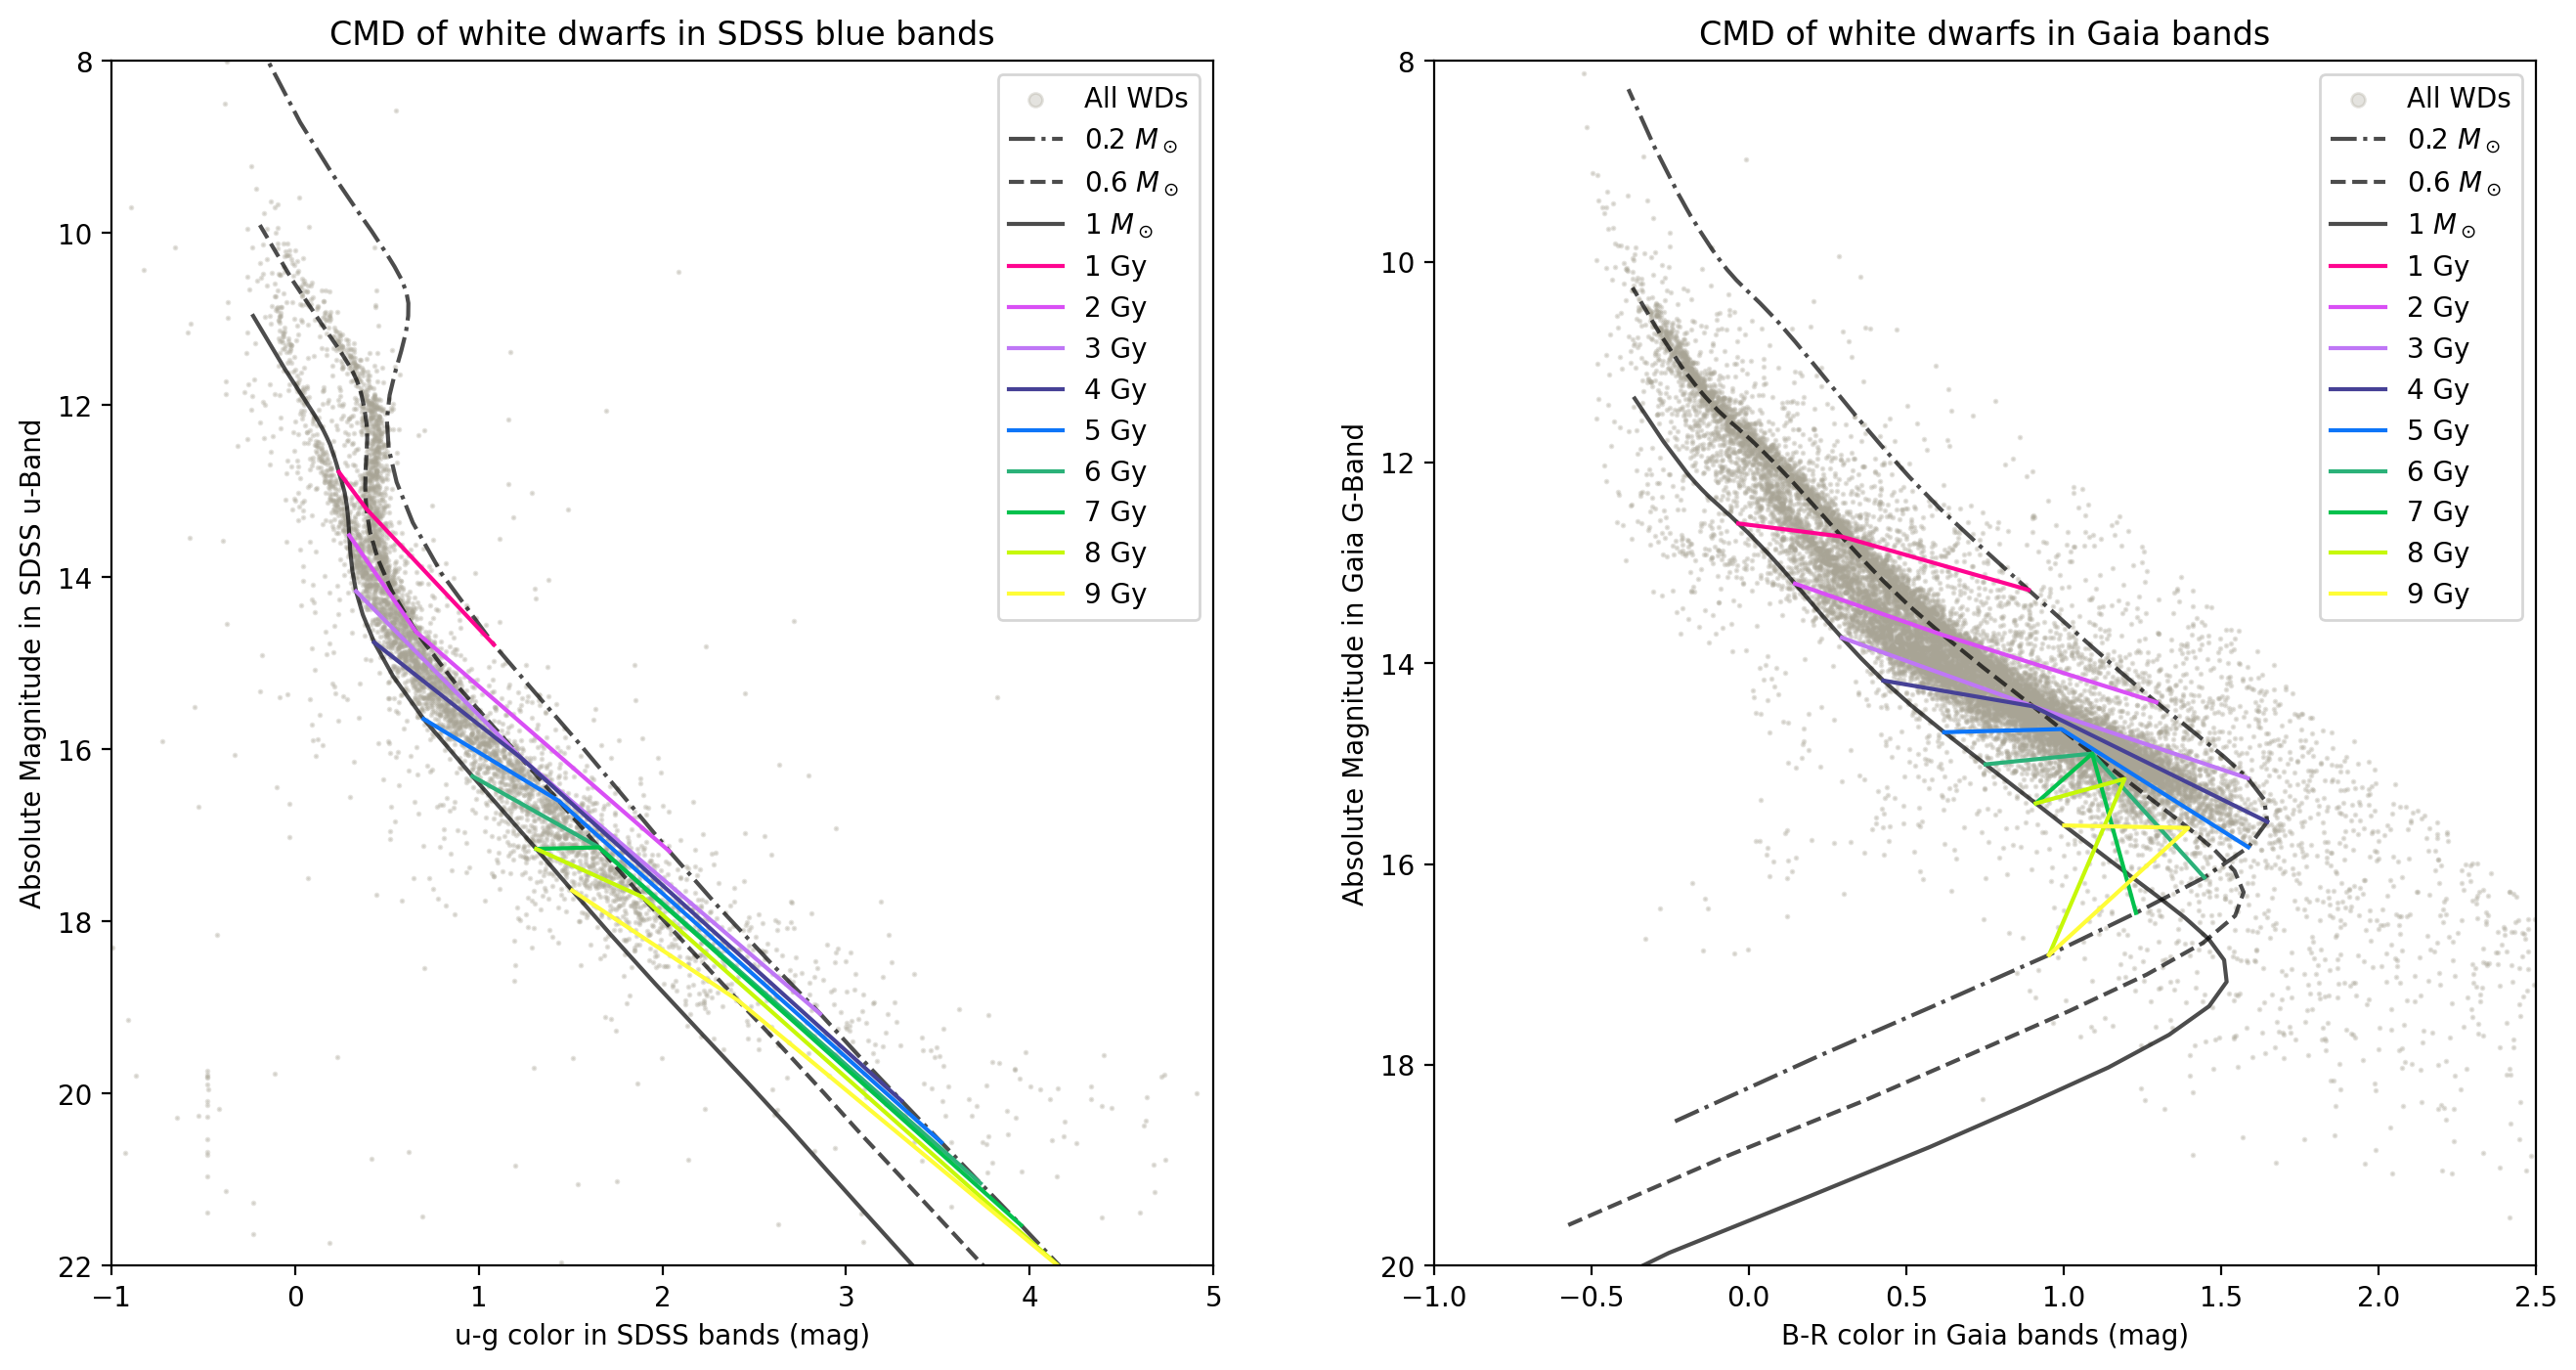

In [20]:
# CMDs cross-matching Gaia with SDSS photometry

#sdss
fig, axs = plt.subplots(1,2,figsize=(16,8), dpi=200)
rnbw_ish = ['xkcd:electric pink','xkcd:heliotrope','xkcd:light purple','xkcd:blueberry',\
            'xkcd:deep sky blue','xkcd:bluey green','xkcd:shamrock green',\
            'xkcd:greeny yellow','xkcd:sunshine yellow']



#all the white dwarfs from gaia
axs[0].scatter(ug_s,umag_abs_s, s = 1, alpha = 0.3, color = 'xkcd:greyish', label= 'All WDs')

#WDs with spectroscopic classification
axs[0].plot(ug_ccrv_02,u_ccrv_02, color = 'xkcd:black', \
            label = r'0.2 $M_\odot$',linestyle='-.',alpha=0.7)           
axs[0].plot(ug_ccrv_06,u_ccrv_06, color = 'xkcd:black',\
            label = r'0.6 $M_\odot$',linestyle='--', alpha=0.7)           
axs[0].plot(ug_ccrv_1,u_ccrv_1, color = 'xkcd:black', \
            label = r'1 $M_\odot$', alpha=0.7)    

#lines of constant age
for i in range(9):
    x = age_lines_sdss[i][0]
    y = age_lines_sdss[i][1]
    axs[0].plot(x,y, color = rnbw_ish[i], label = str(i+1)+' Gy')


axs[0].set_ylim(22,8)
axs[0].set_xlim(-1,5)
axs[0].set_ylabel('Absolute Magnitude in SDSS u-Band')
axs[0].set_xlabel('u-g color in SDSS bands (mag)')
axs[0].set_title('CMD of white dwarfs in SDSS blue bands')
axs[0].legend(markerscale=5)

#gaia
axs[1].scatter(wds_bprp,wds_gmag, s = 1, alpha = 0.3, color = 'xkcd:greyish', label= 'All WDs')
axs[1].plot(bprp_ccrv_02,g_gaia_ccrv_02, color = 'xkcd:black', \
            label = r'0.2 $M_\odot$', linestyle='-.', alpha=0.7)
axs[1].plot(bprp_ccrv_06,g_gaia_ccrv_06, color = 'xkcd:black', \
            label = r'0.6 $M_\odot$',linestyle='--', alpha=0.7)
axs[1].plot(bprp_ccrv_1,g_gaia_ccrv_1, color = 'xkcd:black', \
            label = r'1 $M_\odot$', alpha=0.7)


for i in range(9):
    x = age_lines_gaia[i][0]
    y = age_lines_gaia[i][1]
    axs[1].plot(x,y, color = rnbw_ish[i], label = str(i+1)+' Gy')

axs[1].set_ylim(20,8)
axs[1].set_xlim(-1,2.5)
axs[1].set_ylabel('Absolute Magnitude in Gaia G-Band')
axs[1].set_xlabel('B-R color in Gaia bands (mag)')
axs[1].set_title('CMD of white dwarfs in Gaia bands')
axs[1].legend(markerscale=5)
plt.show()

2e) Comparing to the provided cooling curves (there are several more models than used for (d)), determine the mass for each DA WD and plot their mass distribution as a histogram. Explain its shape.

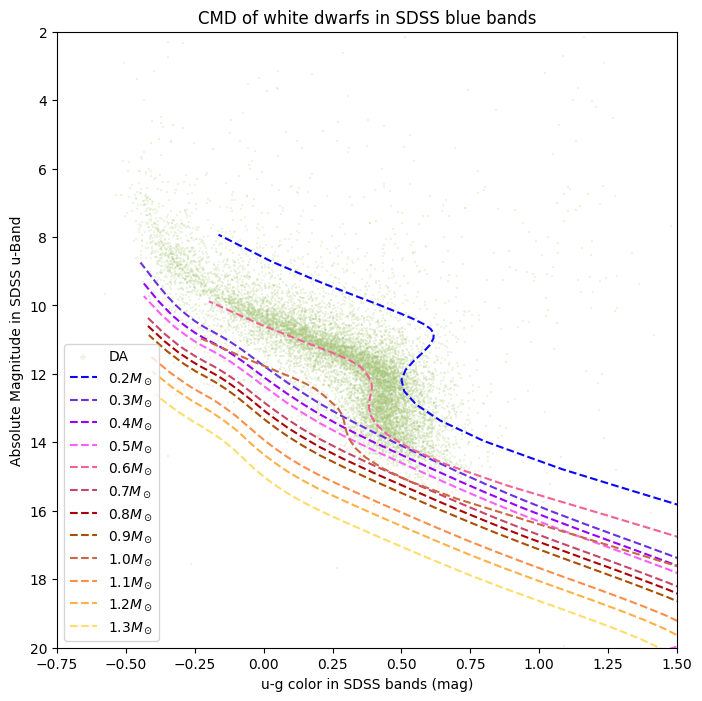

In [21]:
fig, axs = plt.subplots(figsize=(8,8), dpi=100)
axs.scatter(DA_ug_s, DA_u_s, s = 1, alpha = 0.2,marker='+', color='xkcd:light moss green', label = 'DA')

colors = ['xkcd:strong blue', 'xkcd:burple', 'xkcd:vivid purple', 'xkcd:violet pink', 'xkcd:medium pink',\
         'xkcd:deep rose', 'xkcd:darkish red', 'xkcd:cinnamon', 'xkcd:terracota', 'xkcd:orangeish',\
         'xkcd:butterscotch', 'xkcd:pale gold', ]
for i in range(len(cooling_curves)):
    curve = cooling_curves[i]
    u = curve['u']
    g = curve['g.1']
    
    x = u-g
    y = u
    axs.plot(x,y, color = colors[i], label = str((i+2)/10)+r'$M_\odot$', ls='--')




axs.set_ylim(20,2)
axs.set_xlim(-0.75,1.5)
axs.set_ylabel('Absolute Magnitude in SDSS u-Band')
axs.set_xlabel('u-g color in SDSS bands (mag)')
axs.set_title('CMD of white dwarfs in SDSS blue bands')
axs.legend(markerscale=5)

plt.show()